## Incremental Learning for Tinder Preferential AutoSwiping

This is a Colaboratory notebook designed to Simulate Online Learning for Tinder Autoclassification. The simulation relies on minimal batch sizes to achieve the same effect - an alternative would be to save and reload the model after training on each batch, a more realistic but significantly slower approach

For assistance in understanding, refer to the GradientCrescent Tutorial

In [1]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#set randomness for reproducibility
!pip install vis
!pip install -I scipy==1.2.*

!mkdir data

from numpy.random import seed
#seed(6) #1
from tensorflow import set_random_seed
#set_random_seed(5) #2

#

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


#TRAINING SETS########################################

#Download the FFHQ dataset minus asian femals

!gdown https://drive.google.com/uc?id=1neeeqFXWcdgTognHrPlndnjqPUxBBL1i
  
#Downlaod SCUT-FBP Asian Dataset

!gdown https://drive.google.com/uc?id=1IUqrFv9Fal5S3bujWfEx0hIlquecDVFn
  
#Download Ratings CSV - this will be used for beauty ranking (3)


!gdown https://drive.google.com/uc?id=1LBP5MnfB-IY2hSjkt_qsaoqEJv3OS6kD


 

#Unzip all folders

!unzip asian_tinder.zip -d data    
!unzip real_tinder.zip -d data    

     |████████████████████████████████| 24.8MB 63.4MB/s 
     |████████████████████████████████| 20.4MB 51.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


Downloading...
From: https://drive.google.com/uc?id=1neeeqFXWcdgTognHrPlndnjqPUxBBL1i
To: /content/real_tinder.zip
651MB [00:07, 84.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IUqrFv9Fal5S3bujWfEx0hIlquecDVFn
To: /content/asian_tinder.zip
238MB [00:01, 137MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LBP5MnfB-IY2hSjkt_qsaoqEJv3OS6kD
To: /content/tinder_labels.csv
100% 1.84k/1.84k [00:00<00:00, 1.48MB/s]
Archive:  asian_tinder.zip
   creating: data/asian/
  inflating: data/asian/SCUT-FBP-1.jpg  
  inflating: data/asian/SCUT-FBP-10.jpg  
  inflating: data/asian/SCUT-FBP-100.jpg  
  inflating: data/asian/SCUT-FBP-101.jpg  
  inflating: data/asian/SCUT-FBP-102.jpg  
  inflating: data/asian/SCUT-FBP-103.jpg  
  inflating: data/asian/SCUT-FBP-104.jpg  
  inflating: data/asian/SCUT-FBP-105.jpg  
  inflating: data/asian/SCUT-FBP-106.jpg  
  inflating: data/asian/SCUT-FBP-107.jpg  
  inflating: data/asian/SCUT-FBP-108.jpg  
  inflating: data/asian/SCUT-FBP-109.jpg  

In [2]:
print(os.listdir("/content/"))

#Following code is for modifying the dataset in accordance to the rankings of the Asian Female Face dataset. Disabled by default, enable it if you wish to  replicate the beauty-ranking part of tutorial
"""

base_dir_A ='/content/data/asian/'
base_dir_B ='/content/data/real/'
base_dir_Beauty = '/content/data/beauty/'

os.mkdir(base_dir_Beauty)

import pandas as pd
import shutil

ranking = pd.read_csv("tinder_labels.csv")
#print(ranking)

#Iterate over all of the labels within the df
for i, j in ranking.iterrows(): 
  #print(int(j["Image"]))
  filenumber = int(j["Image"])
 
  filename = "SCUT-FBP-"+str(filenumber)+".jpg"
  #Iterrate over all images and move them to beauty. Leftovers move to real.
  #Then set new A class as beauty folder
  
  #Define source and destination, copy it over then
  src =base_dir_A + filename 
  dst =base_dir_Beauty + filename
          
       
  shutil.copy(src, dst) 
  #delete the file you just copied from source directory
  os.remove(src)
  
#Once we do this for all files within the dataframe, move the leftovers to directory B

for filename in os.listdir(base_dir_A): 
       
       leftsrc =base_dir_A + filename 
       leftdst =base_dir_B + filename
          
       # rename() function will 
       # rename all the files 
       shutil.copy(leftsrc, leftdst) 
       os.remove(leftsrc)
  
#Sanity check
print(os.listdir(base_dir_A))

#After this, remember to set the classs directories appropriatelyl
  
       
# /content/data/asian/SCUT-FBP-11.jpg

os.rmdir(base_dir_A) 
"""

['.config', 'real_tinder.zip', 'tinder_labels.csv', 'data', 'asian_tinder.zip', 'sample_data']


'\n\nbase_dir_A =\'/content/data/asian/\'\nbase_dir_B =\'/content/data/real/\'\nbase_dir_Beauty = \'/content/data/beauty/\'\n\nos.mkdir(base_dir_Beauty)\n\nimport pandas as pd\nimport shutil\n\nranking = pd.read_csv("tinder_labels.csv")\n#print(ranking)\n\n#Iterate over all of the labels within the df\nfor i, j in ranking.iterrows(): \n  #print(int(j["Image"]))\n  filenumber = int(j["Image"])\n \n  filename = "SCUT-FBP-"+str(filenumber)+".jpg"\n  #Iterrate over all images and move them to beauty. Leftovers move to real.\n  #Then set new A class as beauty folder\n  \n  #Define source and destination, copy it over then\n  src =base_dir_A + filename \n  dst =base_dir_Beauty + filename\n          \n       \n  shutil.copy(src, dst) \n  #delete the file you just copied from source directory\n  os.remove(src)\n  \n#Once we do this for all files within the dataframe, move the leftovers to directory B\n\nfor filename in os.listdir(base_dir_A): \n       \n       leftsrc =base_dir_A + filename \n

Resnet Initialization

In [51]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow as tf


DATASET_PATH  = '/content/data'

IMAGE_SIZE    = (299, 299)
NUM_CLASSES   = 2
BATCH_SIZE    = 1 # Batch size one to simulate online learning

NUM_EPOCHS    = 150
LEARNING_RATE = 5e-4 #Slow learn rate as we are transfer training5e-5. 2E-4 tried, 
DROP_OUT = .5



#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.3,
                                   fill_mode='constant')

# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
#                                    fill_mode='constant')

train_batches_5 = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=5,
                                                  subset = "training",
                                                  class_mode='binary'
                                                  
                                                  )

valid_batches_5 = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=3,
                                                  subset = "validation",
                                                  class_mode='binary'
                                                 
                                                 
                                                  )

train_batches_1 = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=1,
                                                  subset = "training",
                                                  class_mode='binary'
                                                  
                                                  )

valid_batches_1 = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=1,
                                                  subset = "validation",
                                                  class_mode='binary'
                                                 
                                                 
                                                  )

#MAKE A TEST DATAGEN linking to separate path
#train_batches

#https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 684 images belonging to 2 classes.
Found 293 images belonging to 2 classes.
Found 684 images belonging to 2 classes.
Found 293 images belonging to 2 classes.


Layer Modification at upper layer of Resnet

In [0]:
# build our classifier model based on pre-trained InceptionResNetV2:
# 1. we don't include the top (fully connected) layers of InceptionResNetV2
# 2. we add a DropOut layer followed by a Dense (fully connected)
#    layer which generates softmax class score for each class
# 3. we compile the final model using an Adam optimizer, with a
#    low learning rate (since we are 'fine-tuning')

#If you need help then https://gist.github.com/fchollet/7eb39b44eb9e16e59632d25fb3119975

#############main portion for vgg16 only##############

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Conv2D,MaxPooling2D,Dropout,Flatten,LeakyReLU
from tensorflow.keras import backend as K

from tensorflow.keras.layers import Input

net = InceptionV3(include_top=False,
                        weights='imagenet',
                        input_tensor=None,
                        input_shape=(299,299,3))

# add a global spatial average pooling layer
x = net.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# add dropout
x = Dropout(0.5)(x)
# one fully connected layer more
x = Dense(256, activation='relu')(x)
# add dropout
x = Dropout(0.5)(x)
# one fully connected layer more
x = Dense(32, activation='relu')(x)
# and a logistic layer --
predictions = Dense(1, activation='sigmoid')(x)
model = Model(net.input, predictions)

for layer in net.layers[ :90]:
    layer.trainable = False
model.compile(optimizer=Adam(lr=LEARNING_RATE),
                  loss='binary_crossentropy', metrics=['accuracy'])

#   print(net_final.summary())


 

In [55]:
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 149, 149, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 149, 149, 32) 0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

Training

In [57]:
#FIT MODEL
result=model.fit_generator(train_batches_5,
                        steps_per_epoch = 100,
                        validation_data = valid_batches_5,
                        validation_steps =50,
                        epochs = 3,
#                         
                       )

Epoch 1/3


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


 21/100 [=====>........................] - ETA: 1:28 - loss: 0.0027 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


100/100 [==============================] - 144s 1s/step - loss: 0.0031 - acc: 0.9994 - val_loss: 0.1272 - val_acc: 0.9704
Epoch 2/3
100/100 [==============================] - 134s 1s/step - loss: 0.0027 - acc: 0.9987 - val_loss: 0.2717 - val_acc: 0.9409
Epoch 3/3
100/100 [==============================] - 130s 1s/step - loss: 0.0422 - acc: 0.9868 - val_loss: 0.1964 - val_acc: 0.9524


In [0]:
import matplotlib.pyplot as plt

"""
def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(epochs), acc, label='Train_acc')
    plt.plot(range(epochs), val_acc, label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(epochs), loss, label='Train_loss')
    plt.plot(range(epochs), val_loss, label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result,6)
""" 

In [0]:
"""

model.compile(optimizer=Adam(lr=0.00002),
                  loss='binary_crossentropy', metrics=['accuracy'])

result=model.fit_generator(train_batches_5,
                        steps_per_epoch = 100,
                        validation_data = valid_batches_5,
                        validation_steps =50,
                        epochs = 50,
#                         
                       )


"""


In [0]:
"""

def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(epochs), acc[ :150], label='Train_acc')
    plt.plot(range(epochs), val_acc[ :150], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(epochs), loss[ :150], label='Train_loss')
    plt.plot(range(epochs), val_loss[ :150], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 50)

#Save model first
"""

model.save('Tinder_Incremental.h5') 




Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

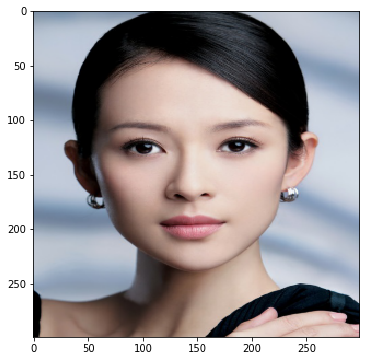

W0902 10:45:20.058880 140126746449792 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(299, 299, 3)
<class 'numpy.float64'>


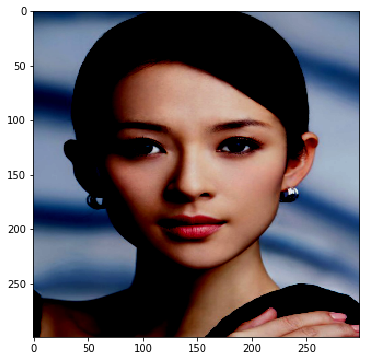

In [58]:
# Class Activation Map Visualization
# https://github.com/Abhijit-2592/Keras-custom-callbacks/blob/master/how%20to%20use%20grad-cam%20in%20inceptionv3_copy.ipynb

#Need to use a bigger batch size

from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from vis.utils import utils
from keras.preprocessing import image
import numpy as np
from keras import activations
from matplotlib import pyplot as plt
%matplotlib inline
from vis.visualization import visualize_cam,overlay

from tensorflow.keras.models import load_model
#Load our saved model, in case the environment crashes

model = load_model('Tinder_Incremental.h5') 
print(model.summary())
#model = InceptionV3(weights='imagenet',include_top=True)

# Utility to search for layer index by name
layer_idx = utils.find_layer_idx(model,'dense_7')

#swap with softmax with linear classifier for the reasons mentioned above
#model.layers[layer_idx].activation = activations.linear
#model = utils.apply_modifications(model)


%matplotlib inline

plt.rcParams['figure.figsize']=(18,6)
###Load's image 
img1 = utils.load_img('/content/data/asian/SCUT-FBP-110.jpg',target_size=(299,299))
print(img1.shape)
print(type(img1))
print(type(img1[0][0][0]))
plt.imshow(img1)
plt.show()
preprocess_img = preprocess_input(img1.astype('float64'))
print(preprocess_img.shape)
print(type(preprocess_img[0][0][1]))
plt.imshow(preprocess_img)
plt.show()




Save model

In [0]:
model.save('Tinder_Incremental.h5') 